## 군집(클러스터링)
- 군집분석은 유사성이 높은 대상의 집단을 분류하는 분석 방법
- 계층적 군집분석과 비계층적 군집준석으로 구분함
  - 전통적인 계층형 군집분석은 군집의 갯수를 나중에 선정함
  - K-means 군집분석은 초기 중심 값은 임의로 선정하며, 중심 값이 이동함
- 군집분석의 평가지표
  - Silhouette(실루엣), Dunn Index 등 활용

### 비계층적 군집분석
- 대표적인 방법 K-means
- K-평균군집(centroid), 임의의 지점 K개를 선택해 해당 중심에서 가까운 데이터를 군집화 하는 방법
- n_cluters 하이퍼파라미터 지정

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [8]:
pred = kmeans.predict(df)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [10]:
# 실제값과 예측값 비교
df["target"] = dataset.target
df["pred"] = pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,0


In [14]:
# PCA -> 군집 -> 시각화
from sklearn.decomposition import PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df["kmeans"] = pred
df

,0,1,kmeans
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,2
3,733.240139,0.192729,2
4,-11.571428,18.489995,1
...,...,...,...
173,-6.980211,-4.541137,1
174,3.131605,2.335191,1
175,88.458074,18.776285,1
176,93.456242,18.670819,1


In [25]:
centers = kmeans.cluster_centers_
centers

array([[-225.41068638,   -2.01255715],
       [ 159.59846763,    6.47648456],
       [ 561.90981841,   -4.15062643]])

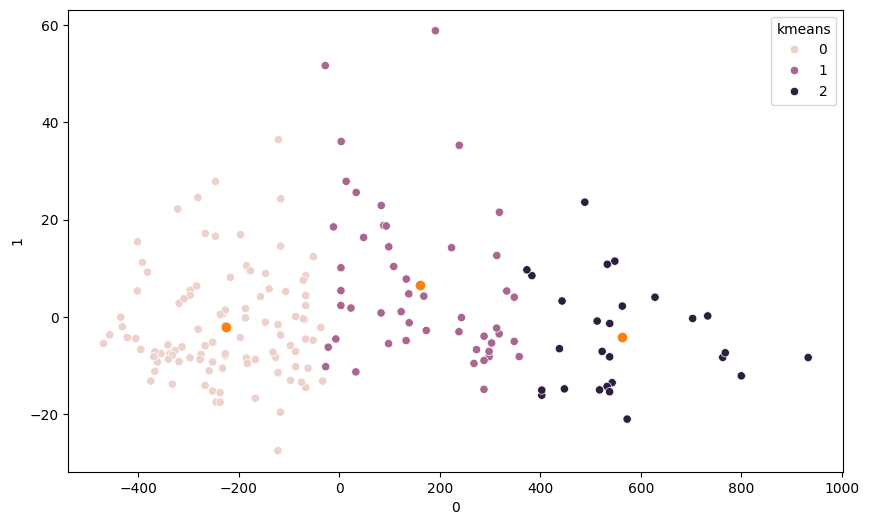

In [27]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df["kmeans"])
plt.scatter(x=centers[:, 0], y=centers[:, 1])

#### 클러스터 개수 찾는 방법 (엘보우 방법, elbow method)

17589255.486760724
4540738.708341662
2630540.9317460293
1348834.069051574
1016271.787839996
644438.6887884006
410921.0143166741
344512.60415107425
287322.4562109953


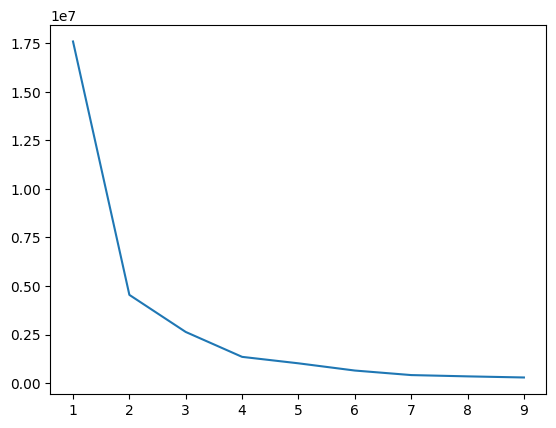

In [32]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.iloc[:, :-1])
    print(kmeans.inertia_)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia)

### 계층적 군집분석
- K-means 와 달리 군집 갯수를 사전에 설정하지 않음
- 덴드로그램

In [36]:
from scipy.cluster.hierarchy import dendrogram, ward

# PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [49]:
# 샘플링
kdata = pd.concat([df[:3], df[70:73], df[160:163]])
kdata

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 30.99151241147203, 30.99151241147203, 0.0],
  [0.0, 147.87787795984784, 147.87787795984784, 30.99151241147203],
  [0.0, 48.027378522150784, 48.027378522150784, 0.0],
  [0.0, 88.07194000276098, 88.07194000276098, 48.027378522150784],
  [0.0, 135.8713524897332, 135.8713524897332, 88.07194000276098],
  [0.0, 190.0301143177092, 190.0301143177092, 0.0],
  [135.8713524897332,
   461.01587369114696,
   461.01587369114696,
   190.0301143177092],
  [147.87787795984784,
   1026.396544382854,
   1026.396544382854,
   461.01587369114696]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C

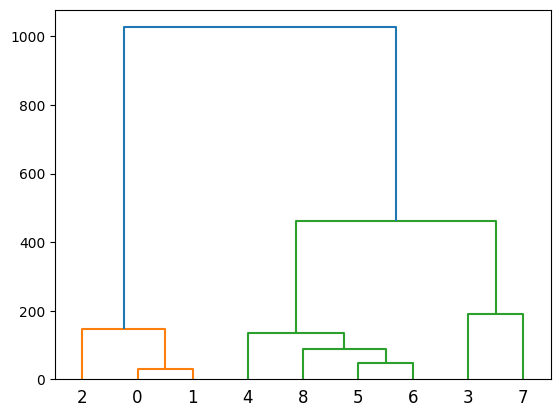

In [50]:
# 덴드로그램
linkage = ward(kdata)
dendrogram(linkage)